# Class Activation Maps

## Imports and Setup

In [1]:
import os 
os.chdir('/home/itingzon.unicef/giga')
from utils import data_utils
from utils import config_utils
from utils import post_utils
from utils import model_utils
from utils import cam_utils

%load_ext autoreload
%autoreload 2

## Load Configurations

In [2]:
iso_code = "SEN"
data_config_file = os.path.join(os.getcwd(), "configs/data_configs/data_config_ISO_AF.yaml")
model_config_file = os.path.join(os.getcwd(), "configs/cnn_configs/convnext_large_v01.yaml")
data_config = config_utils.load_config(data_config_file)
model_config = config_utils.load_config(model_config_file)

## Load Training Data

In [3]:
data = model_utils.load_data(model_config, iso_code=iso_code, attributes=["rurban", "iso"], verbose=False)
data[(data['class'] == 'school') & (data['rurban'] == 'urban')].sample(2)

,UID,source,iso,country,region,subregion,name,giga_id_school,clean,validated,class,ghsl_smod,rurban,dataset,geometry
5601,UNICEF-SEN-SCHOOL-00008671,UNICEF,SEN,Senegal,Africa,Sub-Saharan Africa,EE SEUNE WOLOF,571c896b-2b95-372c-ad0a-ec88ec650d1f,0,0.0,school,21,urban,test,POINT (-1673951.939 1822325.923)
5960,UNICEF-SEN-SCHOOL-00009248,UNICEF,SEN,Senegal,Africa,Sub-Saharan Africa,EE KANEL2,adbd6b66-448d-3367-ac4d-bb026a781dbf,0,0.0,school,23,urban,test,POINT (-1290440.253 1906893.516)


## Show Sample CAM Results

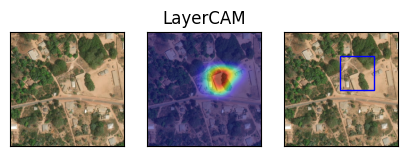

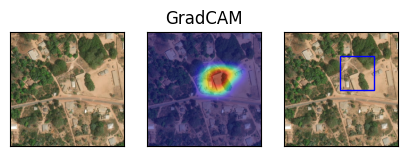

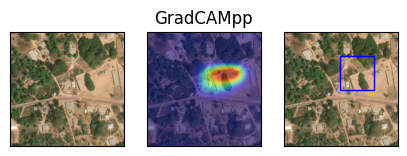

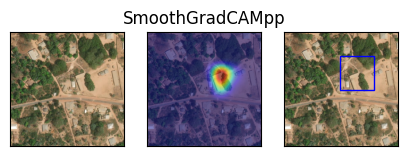

In [4]:
index = 803
filepaths = data_utils.get_image_filepaths(model_config, data)
cam_utils.compare_cams(iso_code, model_config, filepaths[index]);

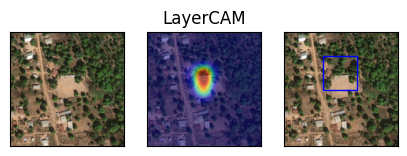

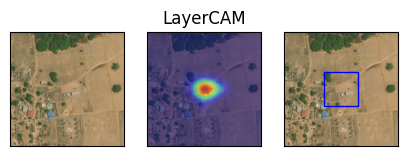

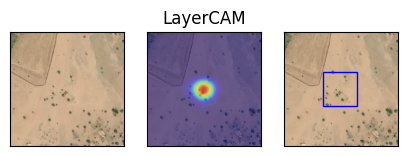

In [5]:
model = cam_utils.compare_cams_random(iso_code, data, model_config, filepaths, verbose=False);

## Load Model Outputs

In [6]:
data = post_utils.load_preds(iso_code, data_config, model_config, sum_threshold=5, source="pred")
data.sample(2)

Reading files for SEN...: 100%|████████████████████| 45/45 [00:03<00:00, 14.29it/s]                                                                                         


,prob,UID,sum,group,geometry,ADM1,ADM2,ADM3,PUID
8219,0.879599,130103,8.0,5464,POINT (-1868630.212 1624606.984),Thies,Mbour,Sessene,Mbour_130103
5412,0.950259,679138,8.0,4242,POINT (-1665688.079 1693036.033),Louga,Linguere,Barkedji,Linguere_679138


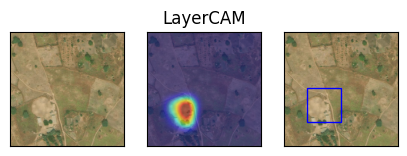

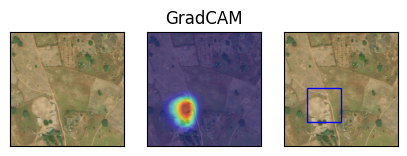

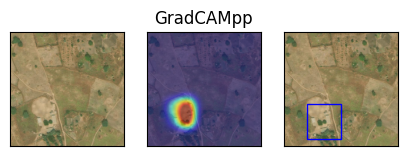

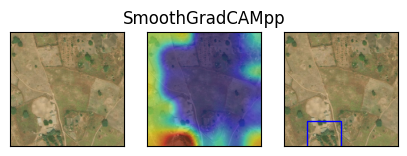

In [7]:
uid = 29335
shapename = "Fatick"
index = data[data.PUID == f'{shapename}_{uid}'].index[0]
sat_dir = os.path.join(os.getcwd(), "output", iso_code, "images", shapename)
filepaths = data_utils.get_image_filepaths(model_config, data, in_dir=sat_dir)
cam_utils.compare_cams(iso_code, model_config, filepaths[index]);

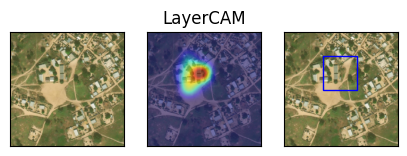

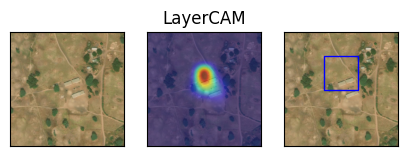

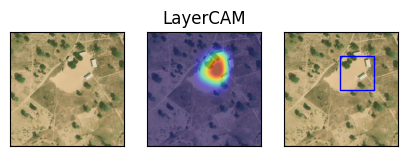

In [8]:
subdata = data[(data["ADM2"] == shapename) & (data['prob'] > 0.9)]
cam_utils.compare_cams_random(iso_code, subdata, model_config, filepaths, verbose=False);